In [7]:
%matplotlib inline
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');
import sys 
sys.path.append('../code_general/')
import read_model_ID;
reload(read_model_ID);

## Load fit data and identify best fit

In [13]:
simset = []
no_good = []
final_par = []

chi_squared = []

file = '28_2_2019/run4/fit_28_2_2019_sim_'
parameters = np.loadtxt('example-params-2.txt')

#---------- collect simulations ---------------
for sim in [1,3,4,7,9,10,11,12,13,17,19,20,24,25,27,29,30,35,37,39,40]:
    sa = pd.read_csv(file +str(sim)+'.txt', delimiter='\t', index_col=False)
    filename = file +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset.append(filename)
    final_par_temp = sa.loc[len(sa)-1,'Parameter 1':'Parameter 43']
    final_par.append(final_par_temp.values)
    
best_fit = simset[np.argmin(chi_squared)]
best_fit

'28_2_2019/run4/fit_28_2_2019_sim_37.txt'

## Matches

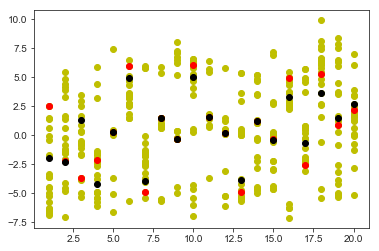

In [30]:
plt.figure()
for i in range(len(chi_squared)):
    plt.plot(range(1,21),final_par[i][0:20],'yo',)
    
plt.plot(range(1,21),final_par[np.argmin(chi_squared)][0:20],'ro')
plt.plot(range(1,21),parameters[0:20],'ko')

## Mismatches

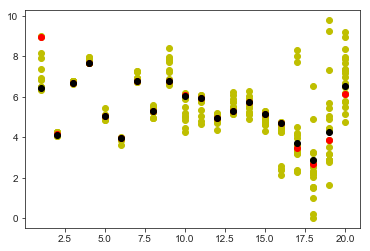

In [15]:
plt.figure()
for i in range(len(chi_squared)):
    plt.plot(range(1,21),final_par[i][20:40],'yo',)
    
plt.plot(range(1,21),final_par[np.argmin(chi_squared)][20:40],'ro')
plt.plot(range(1,21),parameters[20:40],'ko')

## Energy Landscape

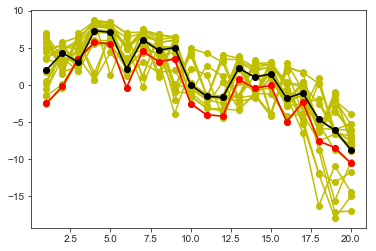

In [16]:
plt.figure()
for i in range(len(chi_squared)):
    plt.plot(range(1,21),-np.cumsum(final_par[i][0:20]),'y-o',)
    
plt.plot(range(1,21),-np.cumsum(final_par[np.argmin(chi_squared)][0:20]),'r-o')
plt.plot(range(1,21),-np.cumsum(parameters[0:20]),'k-o')

## Forward rates

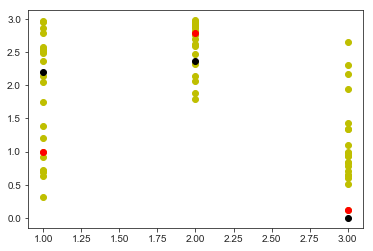

In [18]:
plt.figure()
for i in range(len(chi_squared)):
    plt.plot(range(1,4),final_par[i][40:43],'yo',)
    
plt.plot(range(1,4),final_par[np.argmin(chi_squared)][40:43],'ro')
plt.plot(range(1,4),parameters[40:43],'ko')